In [1]:
# !pip install descartes

In [2]:
# conda install geopandas

In [3]:
# conda install bokeh

In [4]:
# !pip install shapely

In [5]:
import geopandas as gpd

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Point, Polygon

In [7]:
df = pd.read_csv('nyc_birds.csv')

In [8]:
df.head()

,GLOBAL UNIQUE IDENTIFIER,CATEGORY,COMMON NAME,OBSERVATION_COUNT,LATITUDE,LONGITUDE,OBSERVATION_DATE,MONTH,YEAR,OBSERVER ID,DURATION MINUTES,NUMBER OBSERVERS,TRIP COMMENTS,SPECIES COMMENTS,APPROVED
0,URN:CornellLabOfOrnithology:EBIRD:OBS786503632,species,Northern Cardinal,1,40.741895,-73.989308,1880-10-23,10,1880,obsr1385587,NaN,NaN,NaN,NaN,1
1,URN:CornellLabOfOrnithology:EBIRD:OBS786499692,species,Least Sandpiper,1,40.741895,-73.989308,1881-05-14,5,1881,obsr1385587,NaN,NaN,NaN,NaN,1
2,URN:CornellLabOfOrnithology:EBIRD:OBS786503672,species,Barn Swallow,1,40.741895,-73.989308,1884-05-16,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1
3,URN:CornellLabOfOrnithology:EBIRD:OBS786503655,species,Carolina Wren,1,40.741895,-73.989308,1884-05-13,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1
4,URN:CornellLabOfOrnithology:EBIRD:OBS786503665,species,Red-winged Blackbird,1,40.741895,-73.989308,1884-05-01,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699064 entries, 0 to 1699063
Data columns (total 15 columns):
GLOBAL UNIQUE IDENTIFIER    object
CATEGORY                    object
COMMON NAME                 object
OBSERVATION_COUNT           int64
LATITUDE                    float64
LONGITUDE                   float64
OBSERVATION_DATE            object
MONTH                       int64
YEAR                        int64
OBSERVER ID                 object
DURATION MINUTES            float64
NUMBER OBSERVERS            float64
TRIP COMMENTS               object
SPECIES COMMENTS            object
APPROVED                    int64
dtypes: float64(4), int64(4), object(7)
memory usage: 194.4+ MB


In [10]:
df.head()

,GLOBAL UNIQUE IDENTIFIER,CATEGORY,COMMON NAME,OBSERVATION_COUNT,LATITUDE,LONGITUDE,OBSERVATION_DATE,MONTH,YEAR,OBSERVER ID,DURATION MINUTES,NUMBER OBSERVERS,TRIP COMMENTS,SPECIES COMMENTS,APPROVED
0,URN:CornellLabOfOrnithology:EBIRD:OBS786503632,species,Northern Cardinal,1,40.741895,-73.989308,1880-10-23,10,1880,obsr1385587,NaN,NaN,NaN,NaN,1
1,URN:CornellLabOfOrnithology:EBIRD:OBS786499692,species,Least Sandpiper,1,40.741895,-73.989308,1881-05-14,5,1881,obsr1385587,NaN,NaN,NaN,NaN,1
2,URN:CornellLabOfOrnithology:EBIRD:OBS786503672,species,Barn Swallow,1,40.741895,-73.989308,1884-05-16,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1
3,URN:CornellLabOfOrnithology:EBIRD:OBS786503655,species,Carolina Wren,1,40.741895,-73.989308,1884-05-13,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1
4,URN:CornellLabOfOrnithology:EBIRD:OBS786503665,species,Red-winged Blackbird,1,40.741895,-73.989308,1884-05-01,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1


# Plotting Sighting locations using GeoPandas

**IMPORT SHAPE FILE OF NYC**

In [11]:
nyc_shp = gpd.read_file('manhattan_shapefile_from_qgis.shp')
nyc_shp.head()

,countyfp10,vtdst10,geoid10,vtdi10,name10,namelsad10,lsad10,mtfcc10,funcstat10,aland10,...,uss_2_10,uss_6_10,av,ndv,nrv,cartodb_id,created_at,updated_at,comp_dvote,geometry
0,061,97,3606197,P,6400097,Voting District 6400097,V1,G5240,S,27830.0,...,0.806250,0.807453,0.781536,137.550369,38.449635,687,2015-03-17,2015-03-17,105.0,"POLYGON ((-74.00684 40.70786, -74.00764 40.708..."
1,061,797,36061797,P,7100036,Voting District 7100036,V1,G5240,S,21764.0,...,0.968000,0.984556,0.977652,281.563751,6.436255,811,2015-03-17,2015-03-17,234.0,"POLYGON ((-73.94066 40.83473, -73.94351 40.835..."
2,061,156,36061156,P,6500059,Voting District 6500059,V1,G5240,S,17502.0,...,0.696774,0.689873,0.673389,124.577057,60.422943,961,2015-03-17,2015-03-17,81.0,"POLYGON ((-73.94901 40.77334, -73.95126 40.774..."
3,061,1176,360611176,P,7500014,Voting District 7500014,V1,G5240,S,87002.0,...,0.826291,0.829493,0.809526,406.382202,95.617783,1038,2015-03-17,2015-03-17,294.0,"POLYGON ((-73.99180 40.73850, -73.99222 40.737..."
4,061,557,36061557,P,6900006,Voting District 6900006,V1,G5240,S,10898.0,...,0.867021,0.878173,0.835146,200.434982,39.565014,113,2015-03-17,2015-03-17,136.0,"POLYGON ((-73.97361 40.78961, -73.97406 40.788..."


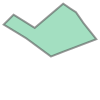

In [12]:
#test out map shape

nyc_shp.iloc[0]['geometry']

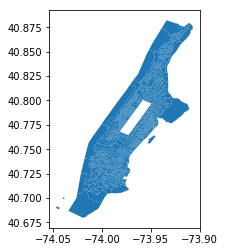

In [13]:
%matplotlib inline

fig,ax = plt.subplots()

nyc_shp.plot(ax=ax)

**Convert Dataframe to coordinate reference system (CRS) FORMAT** 

In [14]:
#instantiate the crs. Here, the epsg code refers to Lat/Long
#https://geopandas.org/projections.html

crs = {'init', 'epsg:4326'}
df.head()

,GLOBAL UNIQUE IDENTIFIER,CATEGORY,COMMON NAME,OBSERVATION_COUNT,LATITUDE,LONGITUDE,OBSERVATION_DATE,MONTH,YEAR,OBSERVER ID,DURATION MINUTES,NUMBER OBSERVERS,TRIP COMMENTS,SPECIES COMMENTS,APPROVED
0,URN:CornellLabOfOrnithology:EBIRD:OBS786503632,species,Northern Cardinal,1,40.741895,-73.989308,1880-10-23,10,1880,obsr1385587,NaN,NaN,NaN,NaN,1
1,URN:CornellLabOfOrnithology:EBIRD:OBS786499692,species,Least Sandpiper,1,40.741895,-73.989308,1881-05-14,5,1881,obsr1385587,NaN,NaN,NaN,NaN,1
2,URN:CornellLabOfOrnithology:EBIRD:OBS786503672,species,Barn Swallow,1,40.741895,-73.989308,1884-05-16,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1
3,URN:CornellLabOfOrnithology:EBIRD:OBS786503655,species,Carolina Wren,1,40.741895,-73.989308,1884-05-13,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1
4,URN:CornellLabOfOrnithology:EBIRD:OBS786503665,species,Red-winged Blackbird,1,40.741895,-73.989308,1884-05-01,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1


In [15]:
"""CREATE POINTS"""

geometry = [Point(xy) for xy in zip( df['LONGITUDE'], df['LATITUDE'])]

In [16]:
#review a single entry
geometry[:3]

In [17]:
geo_df = gpd.GeoDataFrame(df,
                         crs=crs, 
                         geometry=geometry)

In [18]:
geo_df.sample(30)

,GLOBAL UNIQUE IDENTIFIER,CATEGORY,COMMON NAME,OBSERVATION_COUNT,LATITUDE,LONGITUDE,OBSERVATION_DATE,MONTH,YEAR,OBSERVER ID,DURATION MINUTES,NUMBER OBSERVERS,TRIP COMMENTS,SPECIES COMMENTS,APPROVED,geometry
1562237,URN:CornellLabOfOrnithology:EBIRD:OBS807771611,species,American Redstart,4,40.796909,-73.958883,2019-09-21,9,2019,obsr60921,80.0,1.0,NaN,NaN,1,POINT (-73.95888 40.79691)
823258,URN:CornellLabOfOrnithology:EBIRD:OBS424109561,species,European Starling,1,40.753673,-73.983232,2016-08-19,8,2016,obsr555271,22.0,2.0,NaN,NaN,1,POINT (-73.98323 40.75367)
967330,URN:CornellLabOfOrnithology:EBIRD:OBS501457734,species,Cedar Waxwing,6,40.777116,-73.969574,2017-05-18,5,2017,obsr266046,135.0,15.0,NaN,NaN,1,POINT (-73.96957 40.77712)
1152516,URN:CornellLabOfOrnithology:EBIRD:OBS604098090,domestic,Rock Pigeon,5,40.777034,-73.965415,2018-04-21,4,2018,obsr338513,5.0,2.0,NaN,NaN,1,POINT (-73.96541 40.77703)
11885,URN:CornellLabOfOrnithology:EBIRD:OBS312887628,species,Northern Cardinal,1,40.771548,-73.972482,1995-05-06,5,1995,obsr534119,210.0,13.0,NaN,NaN,1,POINT (-73.97248 40.77155)
43961,URN:CornellLabOfOrnithology:EBIRD:OBS117929178,species,Tree Swallow,1,40.771548,-73.972482,2005-04-21,4,2005,obsr266046,NaN,1.0,NaN,/CT /JY,1,POINT (-73.97248 40.77155)
338985,URN:CornellLabOfOrnithology:EBIRD:OBS196496227,species,Black-throated Blue Warbler,1,40.777116,-73.969574,2013-05-12,5,2013,obsr349964,390.0,2.0,NaN,NaN,1,POINT (-73.96957 40.77712)
398758,URN:CornellLabOfOrnithology:EBIRD:OBS216309667,species,Common Grackle,30,40.796089,-73.955895,2013-11-04,11,2013,obsr204089,135.0,1.0,North End,NaN,1,POINT (-73.95589 40.79609)
1381014,URN:CornellLabOfOrnithology:EBIRD:OBS721759276,species,Common Grackle,1,40.796089,-73.955895,2019-03-08,3,2019,obsr498354,72.0,2.0,NaN,NaN,1,POINT (-73.95589 40.79609)
1590732,URN:CornellLabOfOrnithology:EBIRD:OBS804276136,species,Warbling Vireo,1,40.795807,-73.961486,2019-09-12,9,2019,obsr602847,240.0,10.0,NaN,NaN,1,POINT (-73.96149 40.79581)


In [19]:
geo_df.dtypes

GLOBAL UNIQUE IDENTIFIER      object
CATEGORY                      object
COMMON NAME                   object
OBSERVATION_COUNT              int64
LATITUDE                     float64
LONGITUDE                    float64
OBSERVATION_DATE              object
MONTH                          int64
YEAR                           int64
OBSERVER ID                   object
DURATION MINUTES             float64
NUMBER OBSERVERS             float64
TRIP COMMENTS                 object
SPECIES COMMENTS              object
APPROVED                       int64
geometry                    geometry
dtype: object

**Mapping Cardinal vs Bluejay**

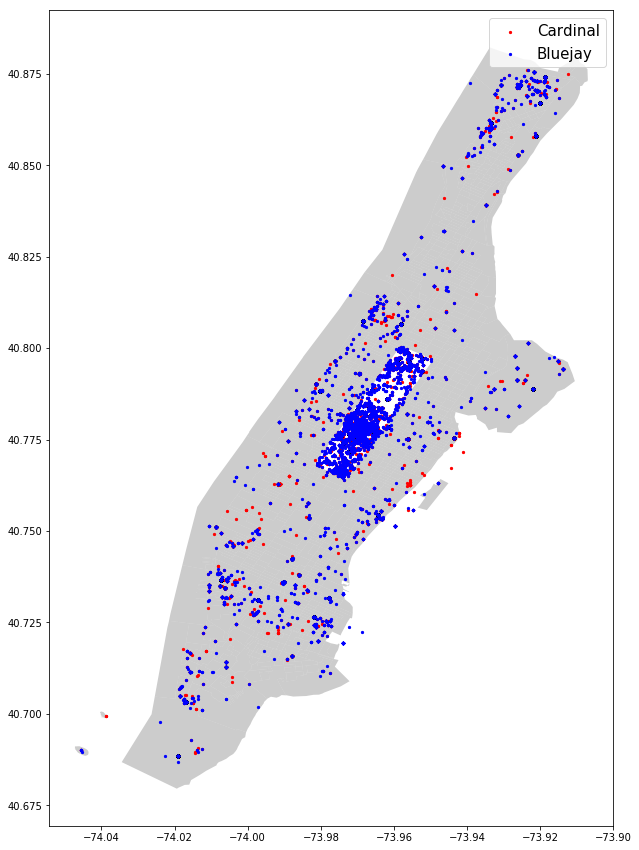

In [20]:
fig, ax = plt.subplots(figsize = (15,15))

nyc_shp.plot(ax=ax, alpha = 0.4, color = 'grey')

# geo_df.plot(ax=ax)
# ax.set_axis_off()

geo_df[geo_df['COMMON NAME'] =='Northern Cardinal'].plot(ax=ax, markersize = 5, color = 'red', marker = 'o', label = 'Cardinal')
geo_df[geo_df['COMMON NAME'] == 'Blue Jay'].plot(ax=ax, markersize=5, color = 'blue', marker = 'o', label ='Bluejay')

plt.legend(prop={'size':15})
# plt.show()

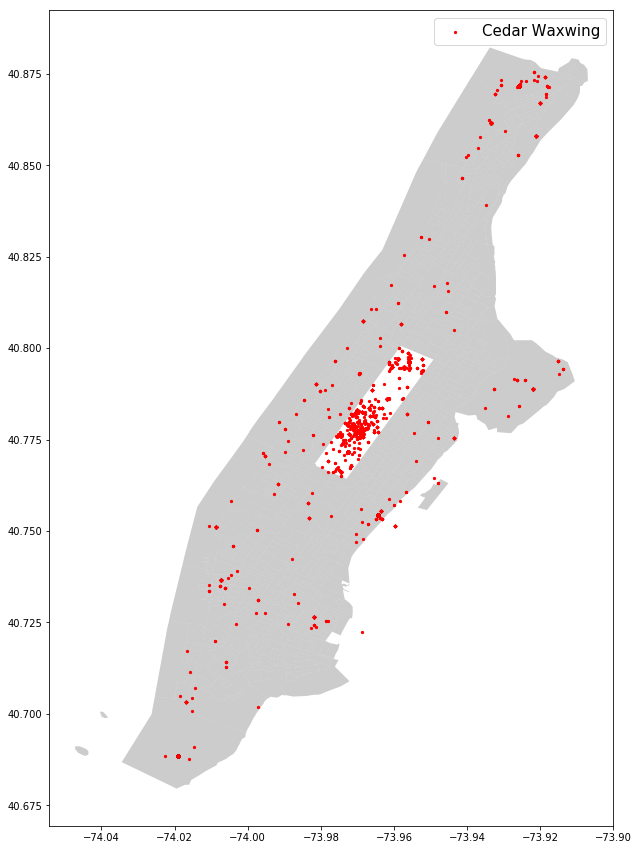

In [22]:
fig, ax = plt.subplots(figsize = (15,15))

nyc_shp.plot(ax=ax, alpha = 0.4, color = 'grey')

# geo_df.plot(ax=ax)
# ax.set_axis_off()

geo_df[geo_df['COMMON NAME'] =='Cedar Waxwing'].plot(ax=ax, markersize = 5, color = 'red', marker = 'o', label = 'Cedar Waxwing')

plt.legend(prop={'size':15})
# plt.show()

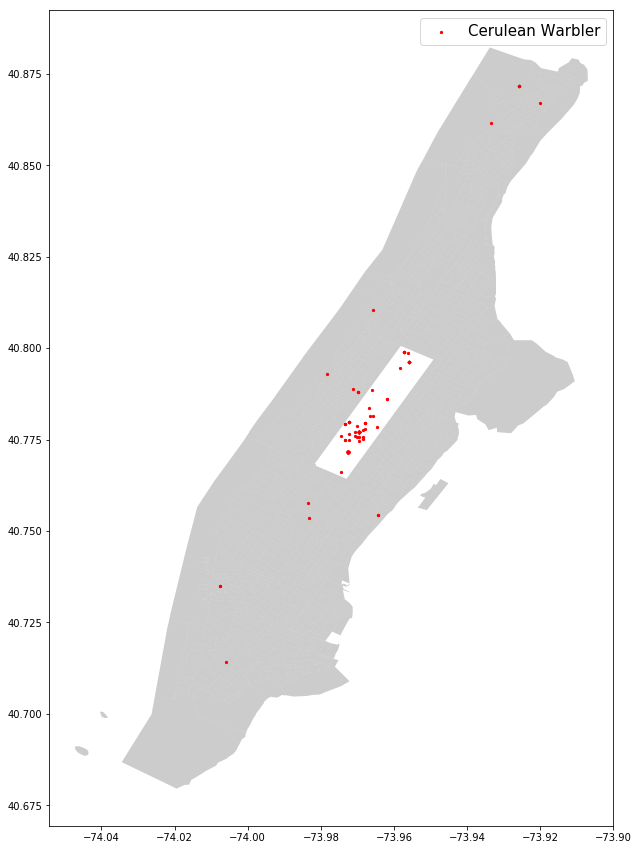

In [28]:
fig, ax = plt.subplots(figsize = (15,15))

nyc_shp.plot(ax=ax, alpha = 0.4, color = 'grey')

# geo_df.plot(ax=ax)
# ax.set_axis_off()

geo_df[geo_df['COMMON NAME'] =='Cerulean Warbler'].plot(ax=ax, markersize = 5, color = 'red', marker = 'o', label = 'Cerulean Warbler')

plt.legend(prop={'size':15})
# plt.show()

In [25]:
df.head()

,GLOBAL UNIQUE IDENTIFIER,CATEGORY,COMMON NAME,OBSERVATION_COUNT,LATITUDE,LONGITUDE,OBSERVATION_DATE,MONTH,YEAR,OBSERVER ID,DURATION MINUTES,NUMBER OBSERVERS,TRIP COMMENTS,SPECIES COMMENTS,APPROVED,geometry
0,URN:CornellLabOfOrnithology:EBIRD:OBS786503632,species,Northern Cardinal,1,40.741895,-73.989308,1880-10-23,10,1880,obsr1385587,NaN,NaN,NaN,NaN,1,POINT (-73.98931 40.74189)
1,URN:CornellLabOfOrnithology:EBIRD:OBS786499692,species,Least Sandpiper,1,40.741895,-73.989308,1881-05-14,5,1881,obsr1385587,NaN,NaN,NaN,NaN,1,POINT (-73.98931 40.74189)
2,URN:CornellLabOfOrnithology:EBIRD:OBS786503672,species,Barn Swallow,1,40.741895,-73.989308,1884-05-16,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1,POINT (-73.98931 40.74189)
3,URN:CornellLabOfOrnithology:EBIRD:OBS786503655,species,Carolina Wren,1,40.741895,-73.989308,1884-05-13,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1,POINT (-73.98931 40.74189)
4,URN:CornellLabOfOrnithology:EBIRD:OBS786503665,species,Red-winged Blackbird,1,40.741895,-73.989308,1884-05-01,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1,POINT (-73.98931 40.74189)


In [26]:
df['COMMON NAME']

0                      Northern Cardinal
1                        Least Sandpiper
2                           Barn Swallow
3                          Carolina Wren
4                   Red-winged Blackbird
5                               Blue Jay
6                  Yellow-rumped Warbler
7          Northern Rough-winged Swallow
8                 Rose-breasted Grosbeak
9                   Ruby-crowned Kinglet
10                White-throated Sparrow
11                Golden-crowned Kinglet
12                      Cerulean Warbler
13                Golden-crowned Kinglet
14                        American Robin
15                     Blackpoll Warbler
16                   Common Yellowthroat
17                       Northern Parula
18                 Yellow-rumped Warbler
19                 Yellow-rumped Warbler
20                White-throated Sparrow
21                         Pine Grosbeak
22                        Brown Thrasher
23                      Eastern Kingbird
24              

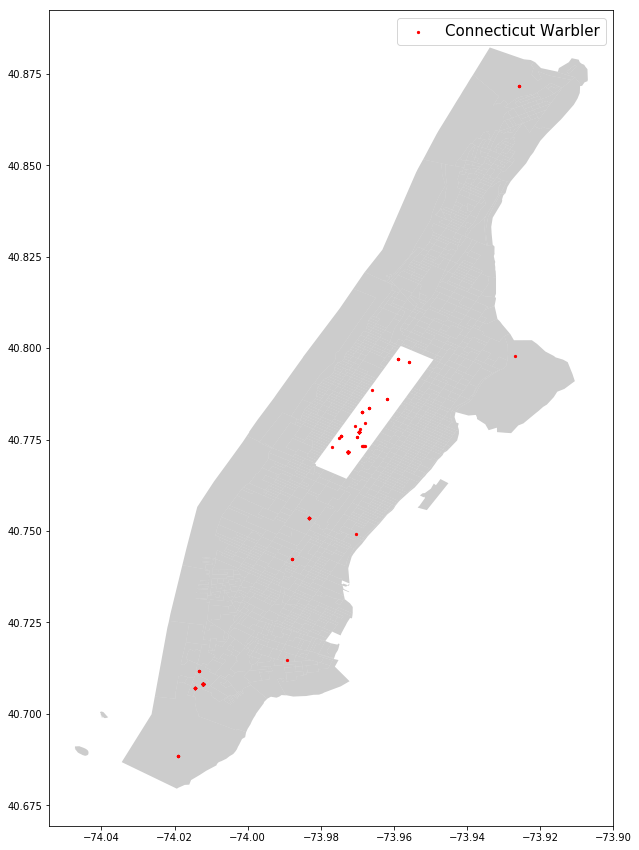

In [30]:
fig, ax = plt.subplots(figsize = (15,15))

nyc_shp.plot(ax=ax, alpha = 0.4, color = 'grey')

# geo_df.plot(ax=ax)
# ax.set_axis_off()

geo_df[geo_df['COMMON NAME'] =='Connecticut Warbler'].plot(ax=ax, markersize = 5, color = 'red', marker = 'o', label = 'Connecticut Warbler')

plt.legend(prop={'size':15})
# plt.show()